# Task - Predecting Sales Price for each House

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## 1. Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("training_set.csv")

## 2. Checking the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [78]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [79]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [80]:
df.duplicated().sum()

np.int64(0)

## 3. Saperating X and Y()

In [81]:
X = df.drop(columns=["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [82]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [83]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

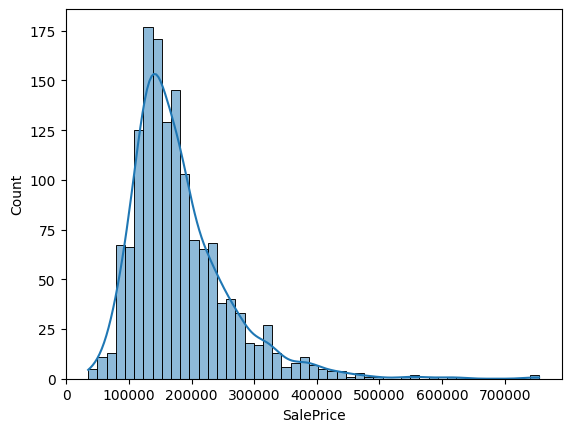

In [84]:
import seaborn as sns
sns.histplot(data= df, x= "SalePrice", kde=True)

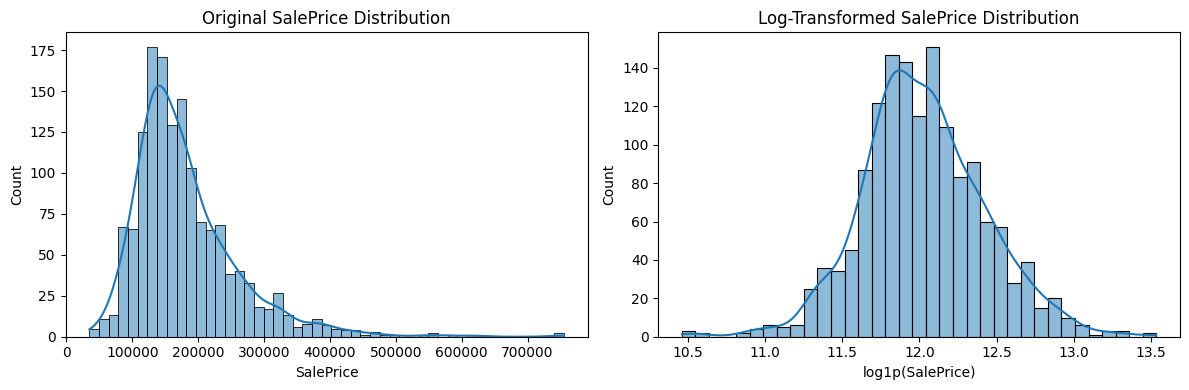

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Figure 1: Distribution of SalePrice (original + log-transformed)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original distribution
sns.histplot(df["SalePrice"], kde=True, ax=axes[0])
axes[0].set_title("Original SalePrice Distribution")
axes[0].set_xlabel("SalePrice")

# Log-transformed distribution
saleprice_log = np.log1p(df["SalePrice"])
sns.histplot(saleprice_log, kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed SalePrice Distribution")
axes[1].set_xlabel("log1p(SalePrice)")

plt.tight_layout()
plt.show()


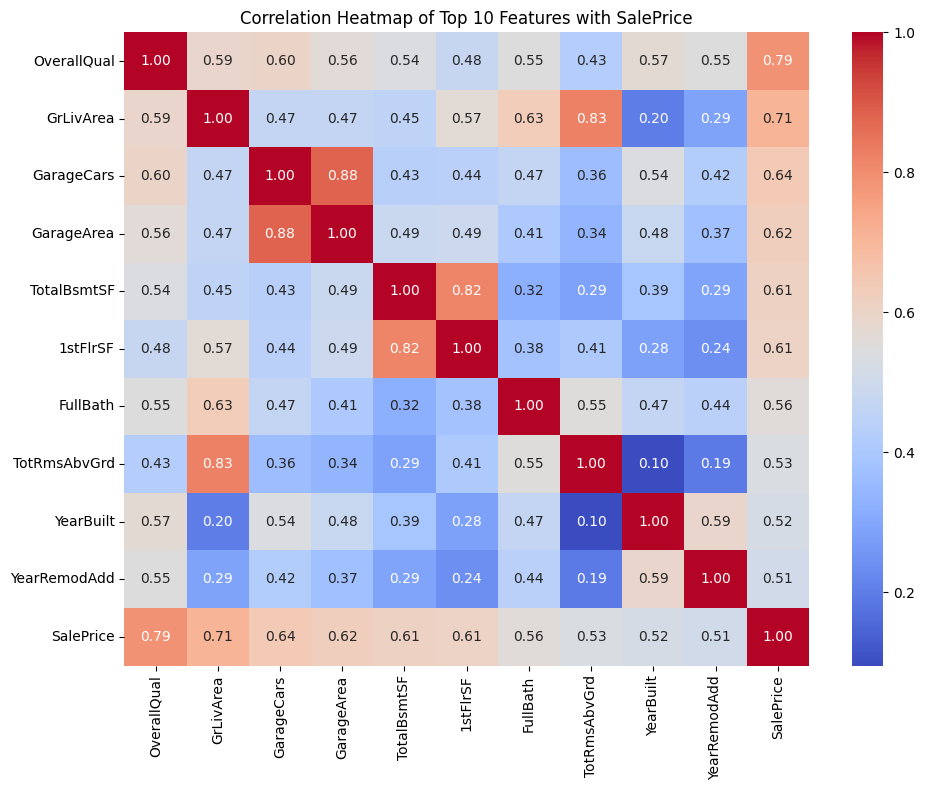

Top 10 features by |correlation| with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Compute correlation of numeric features with SalePrice ---
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Optional: remove Id if present
if "Id" in numeric_features:
    numeric_features.remove("Id")

corr_matrix = df[numeric_features].corr()

# Correlation of each feature with SalePrice
target_corr = corr_matrix["SalePrice"].drop("SalePrice")

# Take top 10 by absolute correlation
top_10_features = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# Build correlation matrix for these features + SalePrice
top_corr = df[top_10_features + ["SalePrice"]].corr()

# --- Plot heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Top 10 Features with SalePrice")
plt.tight_layout()
plt.show()

print("Top 10 features by |correlation| with SalePrice:")
print(target_corr[top_10_features].sort_values(key=np.abs, ascending=False))


## 4. Creating pipeline for Feature Selection

In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(, annot=True, cmap='viridis')
plt.title("Heatmap Example")
plt.show()

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe1 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [17]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
)

In [18]:
pre1 = ColumnTransformer(
    [
        ("num", num_pipe1, con),
        ("cat", cat_pipe1, cat)
    ]
).set_output(transform="pandas")

In [19]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,5.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,8.0,4.0


## 5. Applying Feature Selection

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [21]:
base_model = LinearRegression()

sel = SequentialFeatureSelector(base_model, direction="forward", n_features_to_select="auto")

sel.fit(X_pre, Y)

SequentialFeatureSelector(estimator=LinearRegression())

In [22]:
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageCars', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold', 'cat__Street',
       'cat__LandContour', 'cat__Utilities', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__ExterQual',
       'cat__BsmtQual', 'cat__BsmtCond', 'cat__BsmtExposure',
       'cat__HeatingQC', 'cat__Electrical', 'cat__KitchenQual',
       'cat__Functional', 'cat__GarageCond', 'cat__PavedDrive',
       'cat__Fence', 'cat__MiscFeature'], dtype=object)

In [23]:
len(imp_cols)

39

In [24]:
imp_cols[0]

'num__MSSubClass'

In [25]:
imp_cols[0].split("__")

['num', 'MSSubClass']

In [26]:
sel_cols = [col.split("__")[1] for col in imp_cols]
sel_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [27]:
X_sel = X[sel_cols]
X_sel

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,GrLivArea,BsmtFullBath,KitchenAbvGr,...,BsmtCond,BsmtExposure,HeatingQC,Electrical,KitchenQual,Functional,GarageCond,PavedDrive,Fence,MiscFeature
0,60,8450,7,5,2003,196.0,706,1710,1,1,...,TA,No,Ex,SBrkr,Gd,Typ,TA,Y,NaN,NaN
1,20,9600,6,8,1976,0.0,978,1262,0,1,...,TA,Gd,Ex,SBrkr,TA,Typ,TA,Y,NaN,NaN
2,60,11250,7,5,2001,162.0,486,1786,1,1,...,TA,Mn,Ex,SBrkr,Gd,Typ,TA,Y,NaN,NaN
3,70,9550,7,5,1915,0.0,216,1717,1,1,...,Gd,No,Gd,SBrkr,Gd,Typ,TA,Y,NaN,NaN
4,60,14260,8,5,2000,350.0,655,2198,1,1,...,TA,Av,Ex,SBrkr,Gd,Typ,TA,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0.0,0,1647,0,1,...,TA,No,Ex,SBrkr,TA,Typ,TA,Y,NaN,NaN
1456,20,13175,6,6,1978,119.0,790,2073,1,1,...,TA,No,TA,SBrkr,TA,Min1,TA,Y,MnPrv,NaN
1457,70,9042,7,9,1941,0.0,275,2340,0,1,...,Gd,No,Ex,SBrkr,Gd,Typ,TA,Y,GdPrv,Shed
1458,20,9717,5,6,1950,0.0,49,1078,1,1,...,TA,Mn,Gd,FuseA,Gd,Typ,TA,Y,NaN,NaN


## Applying Preprocessing

## 6. Creating a final preprocessing pipeline on X_sel

In [28]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])

In [29]:
cat_sel

['Street',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature']

In [30]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [31]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [32]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Not Avail"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [33]:
pre2 = ColumnTransformer(
    [
        ("num", num_pipe2, con_sel),
        ("cat", cat_pipe2, cat_sel)
    ]
).set_output(transform="pandas")

In [34]:
X_pre2 = pre2.fit_transform(X)
X_pre2.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not Avail,cat__MiscFeature_Gar2,cat__MiscFeature_Not Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.511418,0.575425,0.370333,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.574410,1.171992,-0.482512,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.323060,0.092907,0.515013,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.574410,-0.499274,0.383659,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.364570,0.463568,1.299326,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## 7. Applying Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre2, Y, test_size=0.2, random_state=17)

In [36]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not Avail,cat__MiscFeature_Gar2,cat__MiscFeature_Not Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
670,0.073375,-0.188801,-0.071836,-0.517200,1.117235,-0.57441,-0.549719,-0.075126,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
794,0.073375,0.031587,0.651479,-0.517200,0.752907,-0.57441,-0.973018,0.722513,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1210,0.073375,0.070273,-0.071836,-0.517200,0.686666,-0.57441,-0.973018,0.627329,-0.819964,-0.211454,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
827,-0.872563,-0.199224,0.651479,-0.517200,0.984752,-0.57441,-0.929153,-0.155080,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1244,0.309859,0.092021,1.374795,1.280685,-1.399941,-0.57441,-0.973018,0.002925,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [37]:
ytrain.head()

,SalePrice
670,173500
794,194500
1210,189000
827,189000
1244,230000


In [38]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not Avail,cat__MiscFeature_Gar2,cat__MiscFeature_Not Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
703,3.147673,-0.289324,-0.795151,3.07857,-2.360443,-0.574410,-0.973018,0.564508,-0.819964,4.328579,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1361,-0.872563,0.565370,0.651479,-0.51720,1.117235,-0.485771,1.821198,0.027672,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
937,0.073375,-0.084370,0.651479,-0.51720,1.117235,-0.574410,-0.225116,0.867192,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1330,-0.872563,-0.051798,1.374795,-0.51720,1.150356,1.696966,-0.973018,0.138085,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
113,-0.872563,1.050645,-0.071836,-0.51720,-0.605043,0.444939,-0.896254,1.415450,1.107810,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
ytest.head()

,SalePrice
703,140000
1361,260000
937,253000
1330,227000
113,217000


In [40]:
xtrain.shape

(1168, 153)

In [41]:
xtest.shape

(292, 153)

## 8. Applying ridge / lasso on seleceted features

## 8.1 Ridge

In [42]:
from sklearn.linear_model import Ridge

import numpy as np

params = {
    "alpha": np.arange(start=0.1, stop=100, step=0.1)
}

params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [43]:
from sklearn.model_selection import GridSearchCV

base_ridge = Ridge()

gscv_ridge = GridSearchCV(base_ridge, param_grid=params, cv=5, scoring="r2", n_jobs=-1)

gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,...
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [44]:
gscv_ridge.best_params_

{'alpha': np.float64(0.8)}

In [45]:
gscv_ridge.best_score_

np.float64(0.8411670186341451)

In [46]:
best_rigid = gscv_ridge.best_estimator_
best_rigid

Ridge(alpha=np.float64(0.8))

In [47]:
best_rigid.score(xtrain, ytrain)

0.9019742695847984

In [48]:
best_rigid.score(xtest, ytest)

0.8871100229483395

## 8.2 Lasso

In [49]:
from sklearn.linear_model import Lasso

base_lasso = Lasso()

gscv_lasso = GridSearchCV(base_lasso, param_grid=params, cv=5, scoring="r2", n_jobs=-1)

gscv_lasso.fit(xtrain, ytrain)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+10, tolerance: 6.046e+08
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.284e+10, tolerance: 5.930e+08
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,...
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

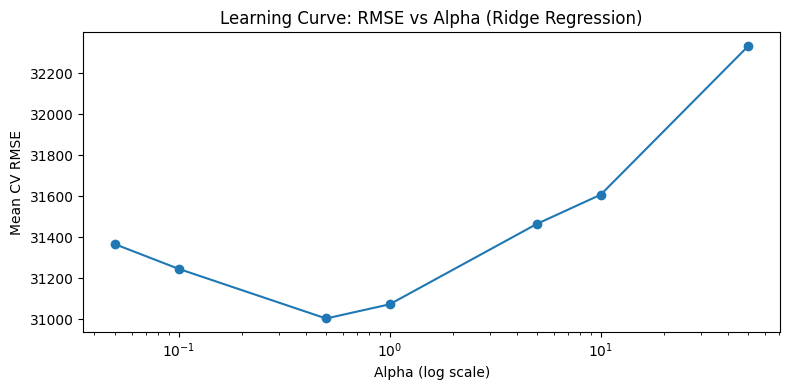

Alpha values: [0.05, 0.1, 0.5, 1, 5, 10, 50]
Mean CV RMSE for each alpha: [31366.22269373 31246.08585305 31003.68541469 31072.86549301
 31465.83767866 31607.80564577 32333.07381513]


In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Define alphas as mentioned in your report
alpha_values = [0.05, 0.1, 0.5, 1, 5, 10, 50]

ridge_for_curve = Ridge()

param_grid_rmse = {"alpha": alpha_values}

gscv_ridge_rmse = GridSearchCV(
    estimator=ridge_for_curve,
    param_grid=param_grid_rmse,
    cv=5,
    scoring="neg_root_mean_squared_error",  # gives negative RMSE
    n_jobs=-1
)

gscv_ridge_rmse.fit(xtrain, ytrain.values.ravel())

mean_rmse = -gscv_ridge_rmse.cv_results_["mean_test_score"]

# Figure 5: RMSE vs Alpha
plt.figure(figsize=(8, 4))
plt.plot(alpha_values, mean_rmse, marker="o")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean CV RMSE")
plt.title("Learning Curve: RMSE vs Alpha (Ridge Regression)")
plt.tight_layout()
plt.show()

print("Alpha values:", alpha_values)
print("Mean CV RMSE for each alpha:", mean_rmse)


In [50]:
gscv_lasso.best_params_

{'alpha': np.float64(90.6)}

In [51]:
gscv_lasso.best_score_

np.float64(0.8472845435853265)

In [52]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=np.float64(90.6))

In [53]:
best_lasso.score(xtrain, ytrain)

0.9019159170219413

In [54]:
best_lasso.score(xtest, ytest)

0.8942823581483749

## 9. Model Evaluation

In [55]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [56]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 Score : {r2:.2%}")

#### Ridge Result

In [57]:
print("Ridge Test Results")
evaluate_model(best_rigid, xtest, ytest)

Ridge Test Results
RMSE : 26367.70
MAE : 18420.96
MAPE : 11.19%
R2 Score : 88.71%


#### Lasso Result

In [58]:
print("Lasso Test Results")
evaluate_model(best_lasso, xtest, ytest)

Lasso Test Results
RMSE : 25516.34
MAE : 17422.82
MAPE : 10.67%
R2 Score : 89.43%


### Above Results Show That Ridge has Highest R2 score

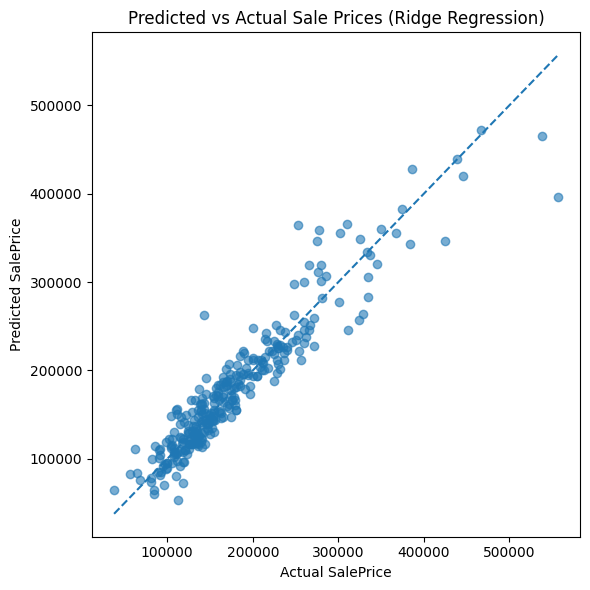

In [87]:
import matplotlib.pyplot as plt

# Ensure ytest is a 1D array/Series
y_test_true = ytest["SalePrice"] if "SalePrice" in ytest.columns else ytest.squeeze()

# Predictions from best Ridge model
y_pred = best_rigid.predict(xtest)

# Figure 3: Predicted vs Actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test_true, y_pred, alpha=0.6)
plt.plot(
    [y_test_true.min(), y_test_true.max()],
    [y_test_true.min(), y_test_true.max()],
    linestyle="--"
)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual Sale Prices (Ridge Regression)")
plt.tight_layout()
plt.show()


y_test_true shape: (292,)
y_pred shape: (292,)
residuals shape: (292,)


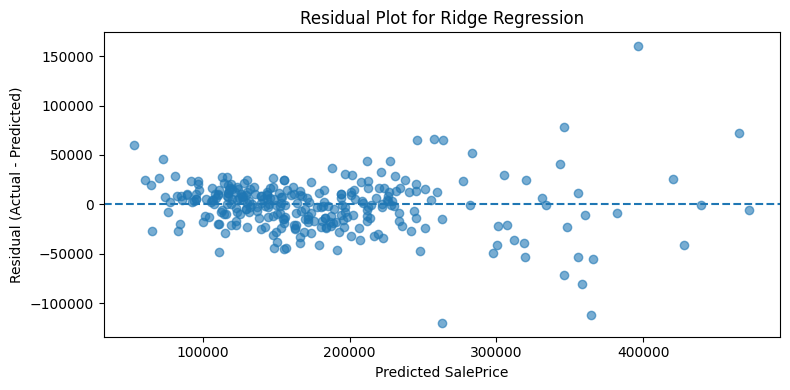

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure both are 1D arrays
if "SalePrice" in ytest.columns:
    y_test_true = ytest["SalePrice"].values.ravel()
else:
    y_test_true = np.array(ytest).ravel()

y_pred = best_rigid.predict(xtest)
y_pred = np.array(y_pred).ravel()   # force to 1D

# Residuals
residuals = y_test_true - y_pred

print("y_test_true shape:", y_test_true.shape)
print("y_pred shape:", y_pred.shape)
print("residuals shape:", residuals.shape)

# Figure 4: Residual Plot
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot for Ridge Regression")
plt.tight_layout()
plt.show()


## 10. Out of Sample Data Predection

In [59]:
xnew = pd.read_csv("sample_set.csv", na_values=["", "NA"], keep_default_na=False)
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
                                  'ScreenPorch', 'PoolArea...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'ExterQual', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'HeatingQC', 'Electrical',
                                  'KitchenQual', 'Functional', 'GarageCond',
                                  'PavedDrive', 'Fence', 'MiscFeature'])])

In [61]:
xnew_pre = pre2.transform(xnew)
xnew_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__BsmtFullBath,num__KitchenAbvGr,...,cat__Fence_GdPrv,cat__Fence_GdWo,cat__Fence_MnPrv,cat__Fence_MnWw,cat__Fence_Not Avail,cat__MiscFeature_Gar2,cat__MiscFeature_Not Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.574410,0.053428,-1.179256,-0.819964,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.023903,1.051363,-0.354966,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.574410,0.761852,0.216136,-0.819964,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.463612,0.347326,0.168544,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.574410,-0.396190,-0.448246,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.438219,-0.859988,-1.518467,1.280685,-0.041991,-0.574410,-0.973018,-0.806136,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1455,2.438219,-0.864197,-1.518467,-0.517200,-0.041991,-0.574410,-0.420316,-0.806136,-0.819964,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1456,-0.872563,0.950423,-0.795151,1.280685,-0.373198,-0.574410,1.711535,-0.554851,1.107810,-0.211454,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1457,0.664586,-0.007600,-0.795151,-0.517200,0.686666,-0.574410,-0.233889,-1.038384,-0.819964,-0.211454,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
preds = best_rigid.predict(xnew_pre)
preds

array([[123538.04223523],
       [149994.22617854],
       [175317.9520839 ],
       ...,
       [176414.62758946],
       [107946.90935527],
       [207487.19405093]])

In [63]:
xnew["Sales_price_pred"] = preds

In [64]:
xnew = xnew.round(2)
xnew

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Sales_price_pred
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,123538.04
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,149994.23
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,175317.95
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,194503.58
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,216451.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,80159.21
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,80199.43
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,176414.63
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,107946.91


In [65]:
xnew.to_csv("Task_1_Results.csv", index=False)

In [66]:
res = xnew[["Id"]]

In [67]:
res["Sale_pred"] = preds

In [68]:
res

,Id,Sale_pred
0,1461,123538.042235
1,1462,149994.226179
2,1463,175317.952084
3,1464,194503.579370
4,1465,216451.061175
...,...,...
1454,2915,80159.207297
1455,2916,80199.427501
1456,2917,176414.627589
1457,2918,107946.909355


In [69]:
res = res.round(2)

In [70]:
res

,Id,Sale_pred
0,1461,123538.04
1,1462,149994.23
2,1463,175317.95
3,1464,194503.58
4,1465,216451.06
...,...,...
1454,2915,80159.21
1455,2916,80199.43
1456,2917,176414.63
1457,2918,107946.91


In [71]:
res.to_csv("Task_1_Results.csv", index=False)

<Axes: xlabel='Sale_pred', ylabel='Count'>

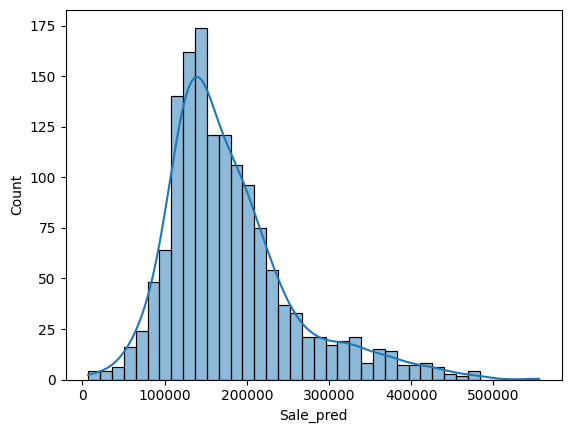

In [72]:
sns.histplot(data=res, x="Sale_pred", kde=True)

In [73]:
%pip install joblib


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [74]:
import joblib

joblib.dump(pre2, "pre.joblib")

['pre.joblib']

In [75]:
joblib.dump(best_rigid, "ridge.joblib")

['ridge.joblib']

In [76]:
p = joblib.load("pre.joblib")

p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
                                  'ScreenPorch', 'PoolArea...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Street', 'LandContour', 'Utilities',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'ExterQual', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'HeatingQC', 'Electrical',
                                  'KitchenQual', 'Functional', 'GarageCond',
                                  'PavedDrive', 'Fence', 'MiscFeature'])])

In [77]:
m = joblib.load("ridge.joblib")

m

Ridge(alpha=np.float64(0.8))